In [1]:
import gym
from pendulum import PendulumDDPGAgent
from maslourl.trackers.file_logger import FileLogger

In [2]:
env = gym.make('Pendulum-v1', g=9.81)

In [3]:
replay_buffer_size = 1000000
training_batch_size = 64
max_episodes = 300
max_steps = 200
model_backup_frequency_episodes = 25
discount_factor = 0.99
tau = 0.005
noise = 0.1

In [3]:
agent = PendulumDDPGAgent(env)

In [5]:
agent.summary()

Observation space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action space: Box([-2.], [2.], (1,), float32)
Model: "pendulum_actor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 400)               1600      
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
 tf.math.multiply (TFOpLambd  (None, 1)                0         
 a)                                                              
                                                                 
Total p

In [6]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps,tau = 0.005, noise = noise, training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups/",
            episodes_for_average_tracking=100, file_logger=FileLogger("./logging/log1.csv"))

episode 0 finished in 200 steps with reward -1408.97. Average reward over last 100: -1408.97 And took: 15.05 seconds. 
episode 1 finished in 200 steps with reward -1528.06. Average reward over last 100: -1468.51 And took: 17.26 seconds. 
episode 2 finished in 200 steps with reward -1542.50. Average reward over last 100: -1493.17 And took: 17.29 seconds. 
episode 3 finished in 200 steps with reward -1519.41. Average reward over last 100: -1499.73 And took: 18.08 seconds. 
episode 4 finished in 200 steps with reward -1390.08. Average reward over last 100: -1477.80 And took: 17.35 seconds. 
episode 5 finished in 200 steps with reward -1541.49. Average reward over last 100: -1488.42 And took: 16.97 seconds. 
episode 6 finished in 200 steps with reward -1317.34. Average reward over last 100: -1463.98 And took: 16.95 seconds. 
episode 7 finished in 200 steps with reward -1585.49. Average reward over last 100: -1479.17 And took: 17.44 seconds. 
episode 8 finished in 200 steps with reward -152


KeyboardInterrupt



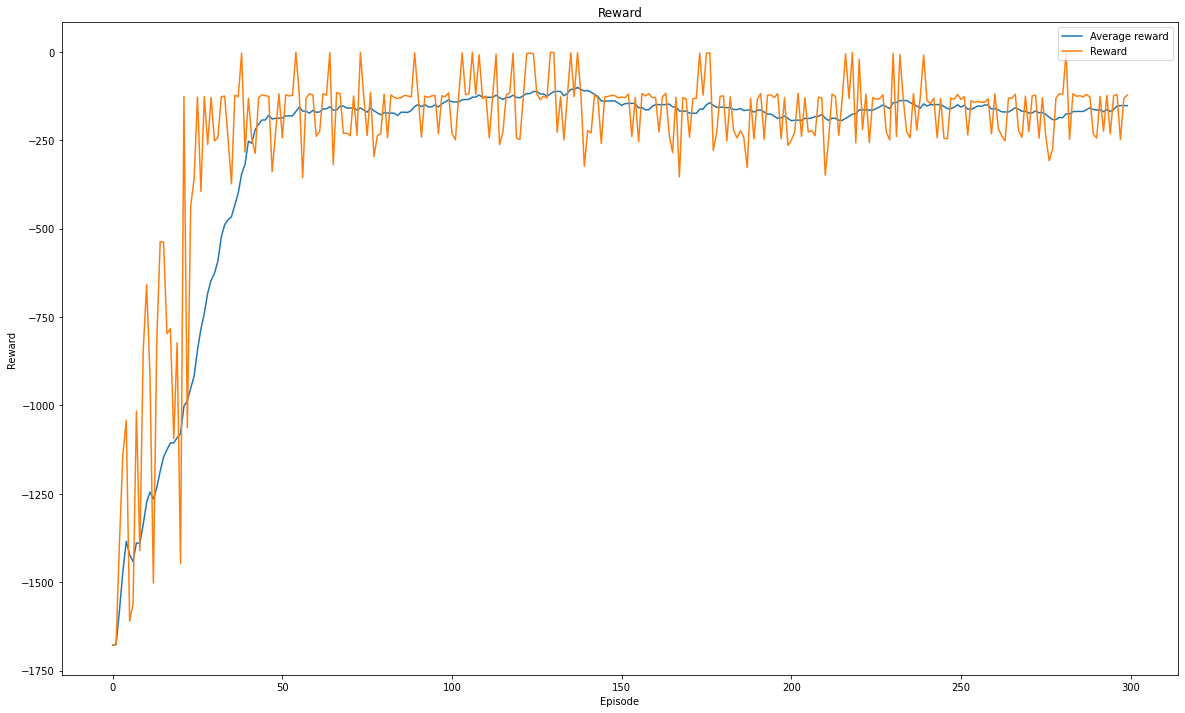

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log2.csv", sep=';')
plt.figure(figsize=(20,12))

plt.plot(data['average'])
plt.plot(data['reward'])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.title('Reward')
plt.show()

In [4]:
agent.load_model("./back_ups/model_130")

In [5]:
agent.test(5, visualize=True)

Starting episode 0
episode 0 finished in 199 steps with reward -124.03. And took: 12.37 seconds. 
Starting episode 1
episode 1 finished in 199 steps with reward -1.96. And took: 10.48 seconds. 
Starting episode 2
episode 2 finished in 199 steps with reward -126.19. And took: 11.18 seconds. 
Starting episode 3
episode 3 finished in 199 steps with reward -1.04. And took: 10.77 seconds. 
Starting episode 4
episode 4 finished in 199 steps with reward -356.53. And took: 10.92 seconds. 
Average reward  -121.94977
